In [0]:
!pip install nnfs

# importing necessary libraries
from pyspark.sql import *
from pyspark.sql.functions import *

# eval libraries
import numpy as np
import pandas as pd

# visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# preprocessing and evaluation libraries - metrics
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# other libraries
import nnfs as nnfs

%matplotlib inline

You should consider upgrading via the '/databricks/python3/bin/python -m pip install --upgrade pip' command.


In [0]:
# read the csv file from S3 bucket
df1 = spark.read.format("csv").option("header", "true").load("s3://bigassfinalproj/apple_stock_data.csv")
display(df1)

_c0,open,close,adj_close,low,high,volume
0,0.5133928656578061,0.5133928656578061,0.0231863558292389,0.5133928656578061,0.515625,117258400
1,0.48883929848671004,0.486607134342194,0.0219766292721033,0.486607134342194,0.48883929848671004,43971200
2,0.453125,0.450892865657806,0.0203636679798365,0.450892865657806,0.453125,26432000
3,0.462053567171097,0.462053567171097,0.0208677183836699,0.462053567171097,0.46428570151328996,21610400
4,0.475446432828903,0.475446432828903,0.0214725751429796,0.475446432828903,0.477678567171097,18362400
5,0.5044642686843871,0.5044642686843871,0.0227831117808819,0.5044642686843871,0.5066964030265809,12157600
6,0.5290178656578061,0.5290178656578061,0.0238920208066702,0.5290178656578061,0.53125,9340800
7,0.5513392686843871,0.5513392686843871,0.0249001272022724,0.5513392686843871,0.553571403026581,11737600
8,0.5803571343421939,0.5803571343421939,0.0262106545269489,0.5803571343421939,0.5825892686843871,12000800
9,0.633928596973419,0.633928596973419,0.0286301076412201,0.633928596973419,0.6361607313156129,13893600


In [0]:
# display count of rows in dataset
df1.count()

Out[209]: 9507

In [0]:
# caching dataset
df2 = df1.cache()
display(df2.collect()[2])

Row(_c0='2', open='0.453125', close='0.450892865657806', adj_close='0.0203636679798365', low='0.450892865657806', high='0.453125', volume='26432000')

In [0]:
# dropping columns
df1 = df2.drop(col("_c0"))

In [0]:
# selecting feature and target data
X = df1.select('open', 'close', 'low', 'high')
y = df1.select("adj_close")

In [0]:
# converting to rdd
Xx = X.rdd
yy = y.rdd

In [0]:
# converting to nd_array format
Xx = np.array(Xx.collect())
yy = np.array(yy.collect())

In [0]:
# converting string to float values
Xx = Xx.astype("float")
yy = yy.astype("float")

In [0]:
# taking first 1000 rows of data
Xx = Xx[:1000]
yy = yy[:1000]

In [0]:
# displaying shape of feature and target data
Xx.shape, yy.shape

Out[217]: ((1000, 4), (1000, 1))

In [0]:
# initializing seed using nnfs
nnfs.init()

# splitting data into train and test
X_train, X_test, y_train, y_test = train_test_split(Xx, yy, test_size=0.2, random_state=42)

In [0]:
# product function
def res_product(a, b):
    return np.matmul(a, b)

# mult product
def prod(a, b):
    return np.multiply(a, b)

class ANN_model:
    
    # creating constructor function
    def __init__(self, number_of_ips, no_of_op, hs = [100], minimum_clipping_val=-5, maximum_clipping_val=5):
        
        self.Nip = number_of_ips
        self.Nop = no_of_op
        self.Nhidden = len(hs)
        self.minimum_clipping_val = minimum_clipping_val
        self.maximum_clipping_val = maximum_clipping_val
        self.Ntotal = [self.Nip] + hs + [self.Nop]

        self.vector_w = dict()
        self.vector_b = dict()
        
        self.slope_scaler_term = 10
        self.bias_scaler_term = 0.0185
        
        # iterate over Nhidden no. of layers
        for k in range(self.Nhidden+1):
            
            # init temp var
            v = k + 1
            
            # init terms 
            wss = (self.Ntotal[v-1], self.Ntotal[1])
            
            # error term
            bss = (1, self.Ntotal[v])
            
            ips = np.zeros(wss)
            bs = np.zeros(bss)
            
            # assigning layer-wise values
            self.vector_w[v] = ips
            self.vector_b[v] = bs

            
    # pass activation function for neuron layers
    def activation_function(self, f_input):
        # exponent term
        expterm = np.exp(-f_input)
        # denominator
        deno = 1.0 + expterm
        # evaluate function
        return 1.0/deno

    # function to ann at first
    def Fpass(self, f_input):
        
        # initializing weight input vector
        self.neuron_input_vector = dict()
        
        # initializing hidden layer vector
        self.middle_layer_vector = dict()
        
        # reshape train data
        fr = f_input.reshape(1, -1)
        
        # assign reshaped ip to first neuron of hidden layer
        self.middle_layer_vector[0] = fr
        
        # assigning range
        no = range(self.Nhidden)
        
        # iterating over the range
        for k in no:
            
            # init temp variable
            v = k + 1
            
            #initializing vectors
            mterm = self.middle_layer_vector[v - 1]
            
            ip_term = self.vector_w[v]
            
            eterm = self.vector_b[v]
            
            # updating input nueron ind weights
            self.neuron_input_vector[v] = res_product(mterm, ip_term) + eterm
            
            # updating middle layer network ind weights
            self.middle_layer_vector[v] = self.activation_function(self.neuron_input_vector[v])
        
        # init terms
        mlen = self.Nhidden + 1
        
        # init total count for layers of network
        mtermtot = self.middle_layer_vector[mlen - 1]
        # input network
        wtermtot = self.vector_w[mlen]
        # error base network
        btermtot = self.vector_b[mlen]
        # calc result
        fres = res_product(mtermtot, wtermtot) + btermtot
        
        # updating input nueron weights
        self.neuron_input_vector[mlen] = fres
        
        # updating middle layer network ind weights
        self.middle_layer_vector[mlen] = self.neuron_input_vector[mlen]
        
        # display outputted value
        print(self.middle_layer_vector[mlen])
        
        # return the final value
        return self.middle_layer_vector[mlen]
    
    # function to output approx values
    def predict(self, f_input):
        
        # target input transformation
        target_input = (self.rnn_predict(f_input)/self.slope_scaler_term) + self.bias_scaler_term
        
        # return transformed output
        return target_input
    
    # internediate layer
    def rnn_predict(self, f_input):
        
        # init term
        predictions = []
        
        # iterate over input list
        for f in f_input:
            # call Function
            op = self.Fpass(f)
            
            # update list
            predictions.append(op)
        
        # convert list to nd-array
        opp = np.array(predictions)
        
        # flatten
        output = opp.squeeze()
        
        # return flattened result
        return output
    
    # mapping function for gradients
    def activation_function_gradients(self, f_input):
        
        # output mapped value for gradient
        return f_input*(1-f_input)
    
    # evaluate cross entropy for model
    def calculate_ce(self, output_val, Pval):
        
        # cross product
        Y_ce=np.multiply(Pval, output_val)
        
        # filtering non-zero values
        Y_ce=Y_ce[Y_ce!=0]
        
        # applying cs function
        Y_ce=-np.log(Y_ce)
        
        # finding mean of transformed values
        Y_ce=np.mean(Y_ce)
        
        # return mean value
        return Y_ce
    
    def calculate_gradients(self, f_input, target_input):
        
        # primary function call
        self.Fpass(f_input)
        
        # initializing derivative weights
        self.derivative_w = dict()
        self.derivative_b = dict()
        self.derivative_h = dict()
        self.derivative_a = dict()
        
        # init middle layer count
        P = self.Nhidden + 1
        
        # init pr
        prange = range(P, 0, -1)
        
        # update input neuron weight
        self.derivative_a[P] = (self.middle_layer_vector[P] - target_input)
        
        # updating gradients
        for k in prange:
            
            # init values
            mterm = self.middle_layer_vector[k-1].T
            
            ipterm = self.derivative_a[k]
            
            iterm = self.vector_w[k].T
            
            ftterm = self.activation_function_gradients(mterm.T)
            
            # updating gradient values
            iprod = res_product(mterm, ipterm)
            mprod = res_product(ipterm, iterm)
            
            # update input graident vector
            self.derivative_w[k] = iprod
            
            # update error vector
            self.derivative_b[k] = ipterm
            
            # update middle layer vector
            self.derivative_h[k-1] = mprod
            
            # init val for above
            mtterm = self.derivative_h[k-1]
            
            # init prod result
            Nprod = prod(mtterm, ftterm)
            
            # update input layer vector
            self.derivative_a[k-1] = Nprod
    
    # precomputation function for feature input data 
    def fit_model(self, f_input, target_input, N, alpha, start="True", show_error_rate=True):
        
        # check param set bool value
        if show_error_rate:
            err = list()

        # if init term is true
        if start:
            # init no term
            no = self.Nhidden+1
            
            # iterate over Nhidden layers
            for k in range(no):
                
                # init vals
                v = k+1
                t = self.Ntotal[v-1]
                tt = self.Ntotal[v]
                r = (1, tt)
                
                # init vector to random set of weights
                self.vector_w[v] = np.random.randn(t, tt)
                
                # init vector to set of zero values
                self.vector_b[v] = np.zeros(r)

        # iterate over N cycles
        for nep in range(N):
            print(nep)
            
            # init count
            mlen = self.Nhidden + 1
            
            # init weight der
            derivative_w = dict()
            
            # init bias der
            derivative_b = dict()
            
            # init middle layer range
            no = range(mlen)
            
            # iterate over Nhidden layers in network
            for k in no:
                # init temp var
                v = k + 1
                # init input weights
                ips = (self.Ntotal[v-1], self.Ntotal[v])
                # init error weights
                bs = (1, self.Ntotal[v])
                # init derivatives of input weight to set of 0s
                derivative_w[v] = np.zeros(ips)
                # init derivatives of error weight to set of 0s
                derivative_b[v] = np.zeros(bs)
            
            # init range
            r = zip(f_input, target_input)
            
            # iterating over train and test data
            for e, f in r:
                
                # init no
                no = range(mlen)
                
                # call function
                self.calculate_gradients(e, f)
                
                # iterating over init values
                for k in no:
                    # init v
                    v = k+1
                    
                    # updating der values
                    derivative_w[v] += self.derivative_w[v]
                    derivative_b[v] += self.derivative_b[v]
            
            # init no term
            no = self.Nhidden + 1
            
            # clip calculate_gradientsient using thresholding
            for k in range(no):
                for o in range(len(derivative_w[k+1])):
                    if derivative_w[k+1][o].max() > self.maximum_clipping_val:
                        derivative_w[k+1][o] = self.maximum_clipping_val
                    if derivative_w[k+1][o].min() < self.minimum_clipping_val:
                        derivative_w[k+1][o] = self.minimum_clipping_val

            # col size of feature vector
            feature_len = f_input.shape[1]
            
            # iterating over Nhidden layers in network
            for k in range(no):
                
                # init v term
                v = k+1
                
                # update weight vector values
                self.vector_w[v] -= (alpha * derivative_w[v])/feature_len
                
                # update bias vector values
                self.vector_b[v] -= (alpha * derivative_b[v])/feature_len

            # check if param set to false or not
            if show_error_rate == True:
                
                # calling function
                predictions = self.predict(f_input)
                
                # updating error list
                err.append(self.calculate_ce(target_input, predictions))

In [0]:
# creating instance of ANN model
ann = ANN_model(Xx.shape[1], 1, [5], -0.5, 0.5)

# fitting model to training data

# init values
f_input = X_train
target_input = y_train

# param setting
alpha = 0.001
n = 10

# call function
ann.fit_model(f_input, target_input, N=n, alpha=alpha, show_error_rate=True)

0
[[0.56298755]]
[[0.58418046]]
[[0.54547953]]
[[0.59219307]]
[[0.5110334]]
[[0.58063972]]
[[0.51591311]]
[[0.508325]]
[[0.55648614]]
[[0.52537628]]
[[0.52548805]]
[[0.52126843]]
[[0.5152323]]
[[0.51680156]]
[[0.5773337]]
[[0.45841198]]
[[0.55352065]]
[[0.47292844]]
[[0.52307216]]
[[0.50214551]]
[[0.468345]]
[[0.43715019]]
[[0.51808243]]
[[0.51052353]]
[[0.51972566]]
[[0.52291075]]
[[0.58670326]]
[[0.43792878]]
[[0.52752861]]
[[0.59295409]]
[[0.43711005]]
[[0.49848955]]
[[0.54778745]]
[[0.59772748]]
[[0.54009147]]
[[0.55687194]]
[[0.4785272]]
[[0.52297171]]
[[0.46248482]]
[[0.45711272]]
[[0.52760936]]
[[0.45355049]]
[[0.55040917]]
[[0.51009289]]
[[0.468345]]
[[0.54184627]]
[[0.45355049]]
[[0.53167332]]
[[0.54017752]]
[[0.48375043]]
[[0.54017752]]
[[0.49811834]]
[[0.50477823]]
[[0.50488852]]
[[0.40629391]]
[[0.44734287]]
[[0.54711007]]
[[0.50041778]]
[[0.53883817]]
[[0.54239523]]
[[0.46923734]]
[[0.50958541]]
[[0.54188048]]
[[0.4880448]]
[[0.42875945]]
[[0.55533852]]
[[0.50267718]]
[[0.

In [0]:
# displaying final weight matrix values
print(ann.middle_layer_vector) 
print(ann.vector_b)

{0: array([[0.49107143, 0.4888393 , 0.4888393 , 0.49107143]]), 1: array([[0.68707753, 0.88941768, 0.64986886, 0.78524138, 0.68479486]]), 2: array([[0.05406247]])}
{1: array([[ 0.16612564, -0.018295  , -0.05700615,  0.03572655, -0.13703129]],
      dtype=float32), 2: array([[-0.30186403]], dtype=float32)}


In [0]:
# predicting on test data
y_pred = ann.predict(X_test)

[[0.0532168]]
[[-0.01776926]]
[[-0.01842475]]
[[0.07830935]]
[[-0.080044]]
[[0.09609087]]
[[0.18691434]]
[[0.08892246]]
[[0.08656798]]
[[0.05838355]]
[[0.03477209]]
[[0.04624572]]
[[0.18472134]]
[[0.04000115]]
[[0.0443556]]
[[0.02227671]]
[[-0.01118344]]
[[0.06228616]]
[[0.02853005]]
[[-0.03439986]]
[[0.14629186]]
[[-0.02405465]]
[[-0.08946177]]
[[0.08808747]]
[[-0.03201225]]
[[-0.02375628]]
[[0.05923485]]
[[0.04521608]]
[[0.04534863]]
[[0.03477749]]
[[-0.07112119]]
[[0.04105307]]
[[0.1845261]]
[[0.08879804]]
[[-0.08652218]]
[[-0.07407733]]
[[0.08971956]]
[[0.1266066]]
[[0.03748829]]
[[0.01193051]]
[[-0.03575224]]
[[0.06082616]]
[[-0.05366862]]
[[0.02195452]]
[[-0.02801146]]
[[-0.00963205]]
[[0.0619365]]
[[0.15538538]]
[[-0.03170972]]
[[0.01962298]]
[[0.14633313]]
[[0.06127893]]
[[-0.00530067]]
[[0.14784552]]
[[0.08110916]]
[[0.08645997]]
[[0.2058317]]
[[0.11340342]]
[[-0.01499343]]
[[0.04236417]]
[[-0.02638787]]
[[0.04494975]]
[[0.14115331]]
[[-0.02116563]]
[[0.18832151]]
[[0.0642915]

In [0]:
# Comparing values of actual and predicted data
for i, j in zip(y_test, y_pred):
    print(i,j)

[0.02348879] 0.023821679614153306
[0.01612964] 0.016723073549560968
[0.01612964] 0.01665752496918566
[0.0315536] 0.026330934939985853
[0.01118993] 0.010495600480996951
[0.02721876] 0.028109087113187575
[0.04889295] 0.03719143423230137
[0.02641228] 0.027392245644241427
[0.02651308] 0.027156798385145037
[0.0226823] 0.024338354977659276
[0.02117014] 0.021977208592983927
[0.02127096] 0.023124571742858376
[0.0433484] 0.03697213372632474
[0.0206661] 0.02250011537640681
[0.02217826] 0.022935560190926525
[0.01996042] 0.02072767078718151
[0.01623044] 0.017381656060095445
[0.02348879] 0.024728615721584926
[0.01996042] 0.02135300522365388
[0.01441586] 0.015060013949605494
[0.03659411] 0.03312918562451592
[0.01522234] 0.016094535080632206
[0.01058507] 0.00955382326360325
[0.0266139] 0.027308747143840434
[0.01461748] 0.015298775427510363
[0.01522234] 0.016124372301441318
[0.02258149] 0.024423485432594774
[0.02117014] 0.02302160841682896
[0.0216742] 0.023034863472857253
[0.02106934] 0.02197774907791

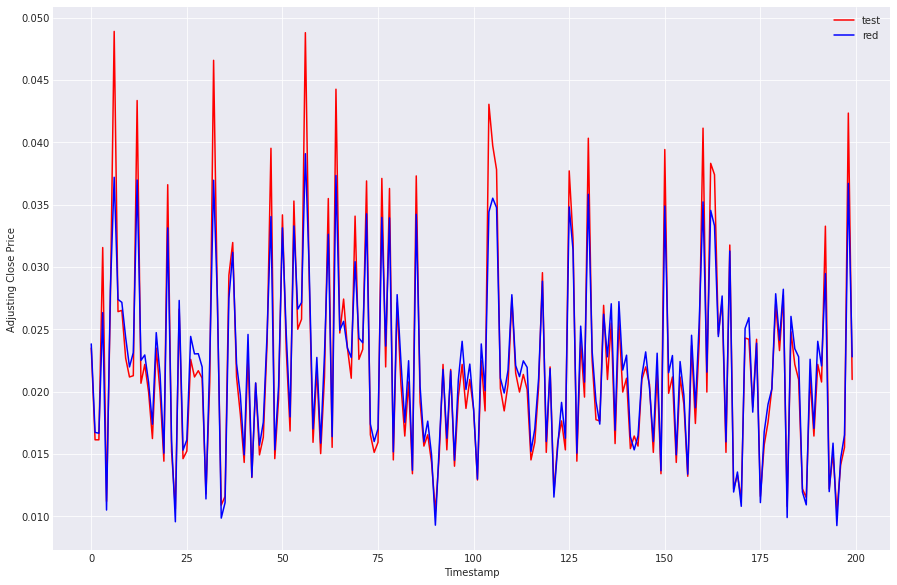

In [0]:
# plot graph to compare

plt.figure(figsize=(15,10))
pred = pd.DataFrame(y_pred, columns=["predicted"])
test = pd.DataFrame(y_test, columns=["test"])

plt.plot(np.arange(len(test)), test["test"], label = "test", color="red")
plt.plot(np.arange(len(pred)), pred["predicted"], label = "red", color="blue")
plt.xlabel("Timestamp")
plt.ylabel("Adjusting Close Price")
plt.legend()
plt.draw()

In [0]:
# Evaluation

print("Mean Absolute Error : ", mean_absolute_error(y_test, y_pred))
print("Root Mean Sqaured Error : ", (mean_squared_error(y_test, y_pred))**0.5)
print("R2 Score : ", r2_score(y_test, y_pred)*100)

Mean Absolute Error :  0.001484660088124948
Root Mean Sqaured Error :  0.0022461259953671527
R2 Score :  92.64803725972396


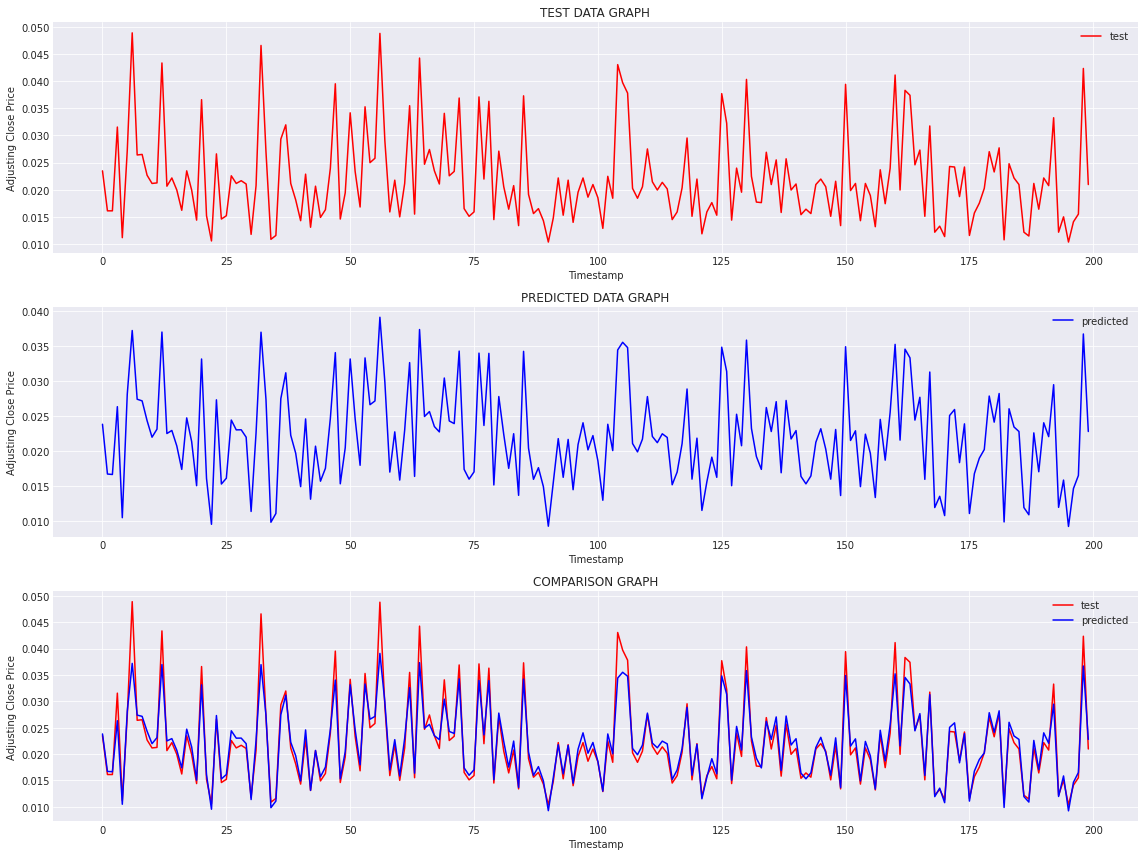

In [0]:
# plotting graph subplots

plt.figure(figsize=(16,12))

plt.subplot(3,1,1)
plt.plot(np.arange(len(test)), test["test"], label = "test", color="red")
plt.title("TEST DATA GRAPH")
plt.xlabel("Timestamp")
plt.ylabel("Adjusting Close Price")
plt.legend()
plt.tight_layout()

plt.subplot(3,1,2)
plt.plot(np.arange(len(pred)), pred["predicted"], label = "predicted", color="blue")
plt.title("PREDICTED DATA GRAPH")
plt.xlabel("Timestamp")
plt.ylabel("Adjusting Close Price")
plt.legend()
plt.tight_layout()

plt.subplot(3,1,3)
plt.plot(np.arange(len(test)), test["test"], label = "test", color="red")
plt.plot(np.arange(len(pred)), pred["predicted"], label = "predicted", color="blue")
plt.title("COMPARISON GRAPH")
plt.xlabel("Timestamp")
plt.ylabel("Adjusting Close Price")
plt.legend()
plt.tight_layout()

plt.draw()

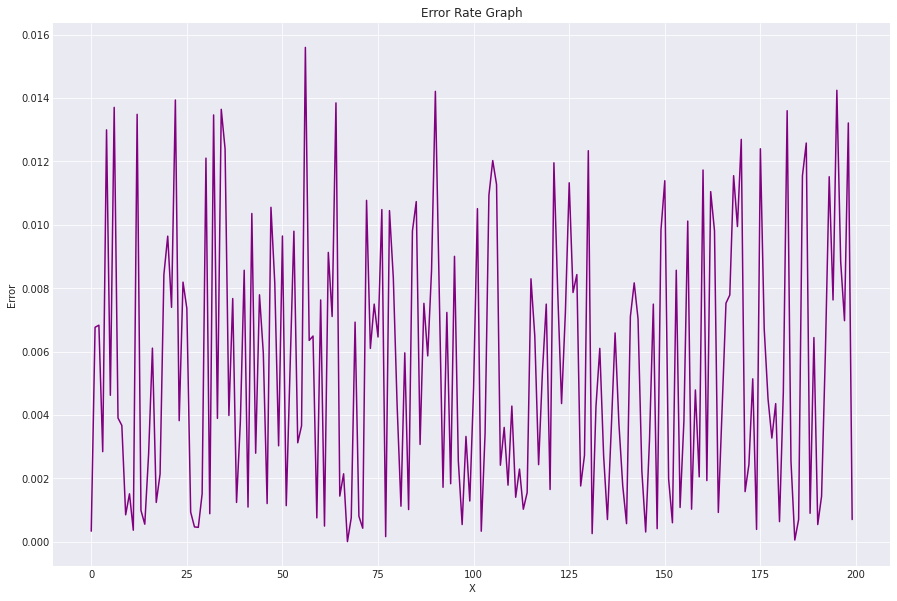

In [0]:
# Error graph
plt.figure(figsize = (15, 10))
plt.title("Error Rate Graph")
plt.plot(np.arange(len(y_pred)), np.abs(y_pred - y_test[0]), color = "purple")
plt.xlabel("X")
plt.ylabel("Error")
plt.show()

In [0]:
# Mean error value
np.mean(np.abs(y_pred - y_test)) * 100

Out[230]: 0.834796587828486

In [0]:
# fin